# Plot Lasso Outputs

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import datetime
import warnings
print(datetime.datetime.now())

2022-10-14 14:47:15.499788


In [4]:
model_names  = ['CanESM5', 'MIROC6', 'GISS-E2-1-G', 'IPSL-CM6A-LR',
                'CNRM-CM6-1', 'NorCPM1']

var_dataset_names = ['AMO', 'IPO', 'NINO34', 'PDO', 'NPI', 'NAM', 'NPO', 'PNA']

# var_colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', 
#               u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22']

model_colors = [np.array([0.9,0.9,0.1]), np.array([0.9,0.1,0.9]), 
                np.array([0.1,0.9,0.9]), np.array([0.9,0.1,0.1]),
                np.array([0.1,0.1,0.9]), np.array([0.6,0.6,0.2]), 
                np.array([0.6,0.2,0.6]), np.array([0.2,0.6,0.6]),
                np.array([0.9,0.2,0.5])]

In [10]:
month_names_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                     'Sep', 'Oct', 'Nov', 'Dec']

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

letter_list = ['a','b','c','d','e','f','g','h', 'i']


month_markers = ['|', '_',4,5,6,7,'o','s','P','p','d','x']

region_names_long = [
    'Beaufort Sea', 'Chukchi Sea', 'East Siberian Sea', 'Laptev Sea', 
    'Kara Sea', 'Barents Sea', 'Greenland Sea', 'Baffin Bay', 
    'Canadian Archipelago', 'Hudson Bay', 'Central Arctic', 'Bering Sea',
    'Baltic Sea', 'Sea of Okhotsk', 'Yellow Sea', 'Cook Inlet',
]

region_names_short = [
    'Beaufort Sea', 'Chukchi Sea', 'E. Siberian Sea', 'Laptev Sea', 'Kara Sea', 
    'Barents Sea', 'Greenland', 'Baffin', 'Canadian AA', 'Hudson', 
    'Central Arctic', 'Bering', 'Baltic', 'Okhotsk', 'Yellow', 'Cook',      
]

## Plot the most important 7 variables for each model and summed by month - AMS Poster

In [8]:
coefs = {}
scores = {}
# coefs_SIT = {}

for model_name in model_names:
    try:
        temp_coefs = xr.open_dataarray(
            '/glade/work/cwpowell/low-frequency-variability/lasso_coefs_scores/'\
            +'SIC_CVDP_Lasso_Coefs_{}_1941_2014_lag_2_20.nc'.format(model_name))
        coefs[model_name] = temp_coefs

        # if model_name != 'CanESM5':
        #     temp_coefs = xr.open_dataarray(
        #         '/glade/work/cwpowell/low-frequency-variability/lasso_coefs_scores/'\
        #         +'SIT_CVDP_Lasso_Coefs_{}_1941_2014_lag_2_20.nc'.format(model_name))
        #     coefs_SIT[model_name] = temp_coefs

        temp_scores = xr.open_dataarray(
            '/glade/work/cwpowell/low-frequency-variability/lasso_coefs_scores/'\
            +'SIC_CVDP_Lasso_Scores_{}_1941_2014_lag_2_20.nc'.format(model_name))
        scores[model_name] = temp_scores
    
    except FileNotFoundError:
        print(model_name)

GISS-E2-1-G


In [4]:
Oct_coefs = xr.open_dataset('/glade/work/cwpowell/low-frequency-variability/'\
    +'lasso_coefs_scores/Subset_regions_SIC_coefs_October.nc')
Oct_scores = xr.open_dataset('/glade/work/cwpowell/low-frequency-variability/'\
    +'lasso_coefs_scores/Subset_regions_SIC_scores_October.nc')

#sum up the months of the same variable
coefs_oct_sum = {}

for model_name in model_names:
    all_vars = []
    for var_dataset in var_dataset_names:
        list_var_month = []
        for month_ in np.arange(1,13):
            list_var_month.append(str(var_dataset)+'_'+str(month_).zfill(2))
        all_vars.append(Oct_coefs[model_name].sel(var_month=list_var_month).sum('var_month'))
    
    all_vars_xr = xr.concat((all_vars), dim='variable')
    all_vars_xr['variable'] = var_dataset_names
    coefs_oct_sum[model_name] = all_vars_xr

In [9]:
#sum up the months of the same variable
coefs_sum = {}
# coefs_SIT_sum = {}


for model_name in ['CanESM5', 'MIROC6', 'IPSL-CM6A-LR', 'CNRM-CM6-1', 'NorCPM1']:
    all_vars = []
    for var_dataset in var_dataset_names:
        list_var_month = []
        for month_ in np.arange(1,13):
            list_var_month.append(str(var_dataset)+'_'+str(month_).zfill(2))
        all_vars.append(coefs[model_name].sel(var_month=list_var_month).sum('var_month'))
    
    coefs_sum_model = xr.concat((all_vars), dim='variable')
    coefs_sum_model['variable'] = var_dataset_names
    coefs_sum[model_name] = coefs_sum_model
    
# for model_name in ['MIROC6', 'IPSL-CM6A-LR', 'CNRM-CM6-1', 'NorCPM1']:
#     all_vars = []
#     for var_dataset in var_dataset_names:
#         list_var_month = []
#         for month_ in np.arange(1,13):
#             list_var_month.append(str(var_dataset)+'_'+str(month_).zfill(2))
#         all_vars.append(coefs_SIT[model_name].sel(var_month=list_var_month).sum('var_month'))
    
#     coefs_SIT_sum_model = xr.concat((all_vars), dim='variable')
#     coefs_SIT_sum_model['variable'] = var_dataset_names
#     coefs_SIT_sum[model_name] = coefs_SIT_sum_model

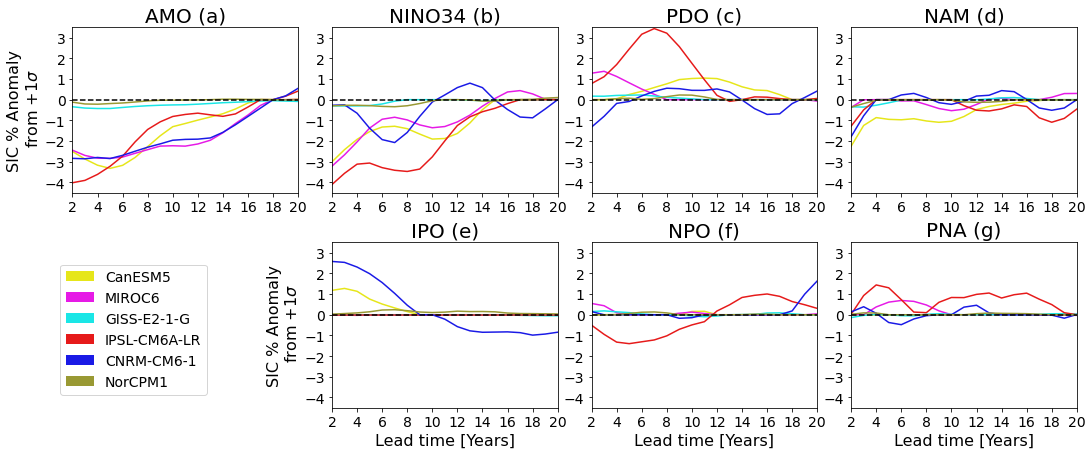

In [16]:
alpha_list = [0.75,0.5,0.1,0.75,0.5,0.1]
region_ = 3
# predict_month = 10

fig, axes = plt.subplots(2,4,figsize=[18,7])

for var_i, var_dataset in enumerate(['AMO', 'NINO34', 'PDO', 'NAM', 'NPI', 'IPO', 'NPO', 'PNA']):
    y = int(var_i % 4)
    x = int(np.floor(var_i/4))    
    
    for model_i, model_name in enumerate(model_names):
    
        axes[x][y].plot(np.arange(2,21), coefs_oct_sum[model_name].sel(
            alpha=alpha_list[model_i]).sel(region=region_).sel(
            variable=var_dataset), c=model_colors[model_i], label=model_name)
        
    axes[x][y].axhline(0, linestyle='--', c='k');
    # axes[x][y].legend()
    axes[x][y].set_xlim(2,15)
    axes[x][y].set_ylim(-4.5,3.5)
    axes[x][y].set_yticks(np.arange(-4,3.1,1))
    axes[x][y].set_xticks(np.arange(2,21,2))
    axes[x][y].tick_params(axis='both', labelsize=14)
    
    if x==1:
        axes[x][y].set_xlabel('Lead time [Years]', fontsize=16)
    if y==0 or (x==1 and y==1):
        axes[x][y].set_ylabel(r'SIC % Anomaly'+'\n'+r' from $+1 \sigma$', fontsize=16)
    if x==1:
        axes[x][y].set_title(var_dataset+' ('+letter_list[var_i-1]+')', fontsize=20)
    else:
        axes[x][y].set_title(var_dataset+' ('+letter_list[var_i]+')', fontsize=20)

fig.delaxes(axes[1][0])

legend_elements = [Patch(facecolor=model_colors[0], label=model_names[0]),
                   Patch(facecolor=model_colors[1], label=model_names[1]),
                   Patch(facecolor=model_colors[2], label=model_names[2]),
                   Patch(facecolor=model_colors[3], label=model_names[3]),
                   Patch(facecolor=model_colors[4], label=model_names[4]),
                   Patch(facecolor=model_colors[5], label=model_names[5]),]

extra_legend = plt.legend(handles=legend_elements, 
                          bbox_to_anchor=(-3.18, 0.1), loc='lower center', 
                          borderaxespad=-0.25, ncol=1, fontsize=14)


plt.subplots_adjust(hspace=0.3, wspace=0.15)

fig.savefig('/glade/work/cwpowell/low-frequency-variability/figures/'\
           +'Oct_Region_3_variables_lead_time.pdf', bbox_inches='tight')

fig.savefig('/glade/work/cwpowell/low-frequency-variability/figures/'\
           +'Oct_Region_3_variables_lead_time.png', bbox_inches='tight', dpi=400)

# 7 Region by 8 Climate Mode plot, train on CMIP6 not individual LEs

In [6]:
#first member (equally weighted)
CMIP6_coefs_SIC = xr.open_dataarray(
    '/glade/work/cwpowell/low-frequency-variability/lasso_coefs_scores/'\
    +'SIC_CVDP_Lasso_Coefs_first_mem_CMIP6_models_1941_2014_lag_2_20_'\
    +'alpha_0001_008.nc')

CMIP6_scores_SIC = xr.open_dataarray(
    '/glade/work/cwpowell/low-frequency-variability/lasso_coefs_scores/'\
    +'SIC_CVDP_Lasso_Scores_first_mem_CMIP6_models_1941_2014_lag_2_20_'\
    +'alpha_0001_008.nc')

#SIT first members (equally weighted 39 models)
CMIP6_coefs_SIT = xr.open_dataarray(
    '/glade/work/cwpowell/low-frequency-variability/lasso_coefs_scores/'\
    +'SIT_CVDP_Lasso_Coefs_first_mem_CMIP6_models_1941_2014_lag_2_20_'\
    +'alpha_005_05.nc')

CMIP6_scores_SIT = xr.open_dataarray(
    '/glade/work/cwpowell/low-frequency-variability/lasso_coefs_scores/'\
    +'SIT_CVDP_Lasso_Scores_first_mem_CMIP6_models_1941_2014_lag_2_20_'\
    +'alpha_005_05.nc')

In [7]:
#sum up the months of the same variable
all_vars = []
for var_dataset in var_dataset_names:
    list_var_month = []
    for month_ in np.arange(1,13):
        list_var_month.append(str(var_dataset)+'_'+str(month_).zfill(2))
        
    all_vars.append(CMIP6_coefs_SIC.sel(var_month=list_var_month).sum('var_month'))

coefs_CMIP6 = xr.concat((all_vars), dim='variable')
coefs_CMIP6['variable'] = var_dataset_names

In [8]:
#take away small values from the score sums to ensure only 1 alpha
#value is a maximum
scores_sum = CMIP6_scores_SIC.sel(train_test='test').sum('lag')
scores_sum_sub = []

for alpha_i, alpha_ in enumerate(CMIP6_scores_SIC['alpha'].values):
    
    scores_sum_sub.append(scores_sum.sel(alpha=alpha_)-(1e-8*alpha_i))
    
scores_sum_sub = xr.concat((scores_sum_sub), dim='alpha')    

alpha_correct = scores_sum_sub['alpha'].where(scores_sum_sub.rank(
    'alpha')==len(scores_sum_sub['alpha'])).max('alpha')

## Make figure with all months of the year trained on first member

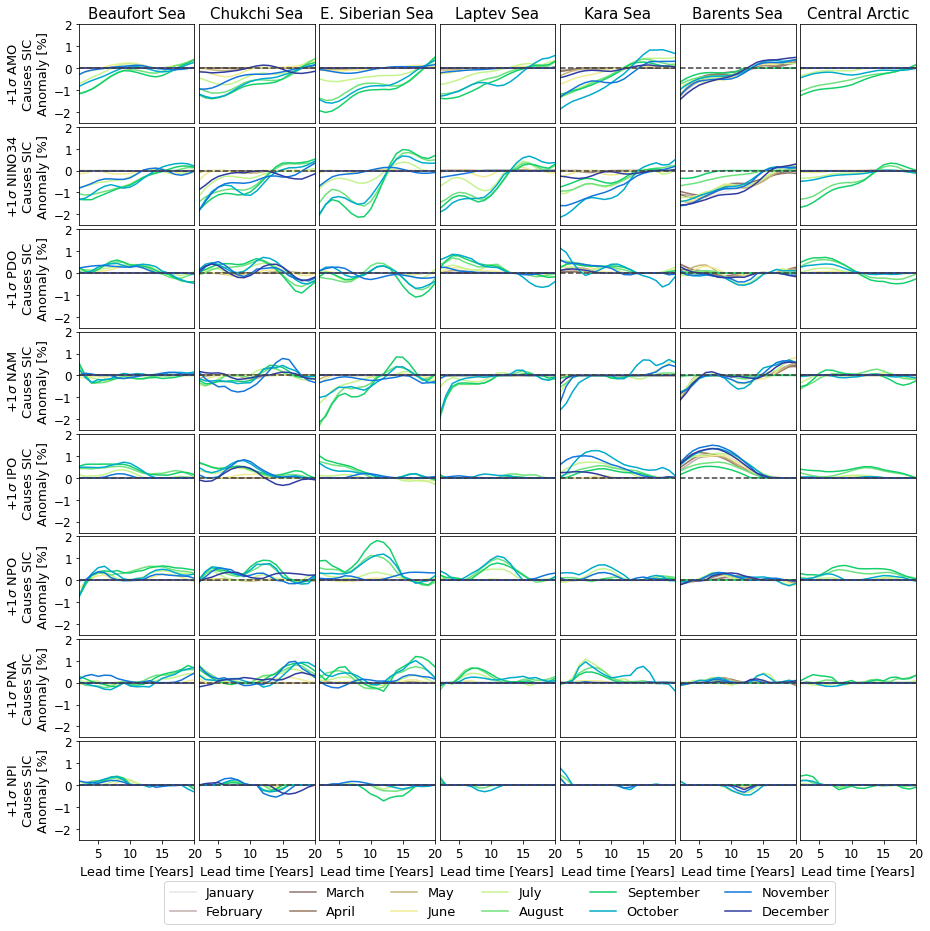

In [11]:
#8 x 7 figure, just regions 1-6,11

#define the colors
cmap = plt.cm.terrain  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)][::-1][10:] #all the colors in cmap

fig, axes = plt.subplots(8,7,figsize=[15,15])

for var_i, var_dataset in enumerate(['AMO', 'NINO34', 'PDO', 'NAM',
                                     'IPO', 'NPO', 'PNA', 'NPI']):
    
    for region_i, region_ in enumerate([1,2,3,4,5,6,11]):
    
        for month_ in np.arange(1,13):
            
            alpha_ = alpha_correct.sel(month=month_).sel(region=region_).values

            axes[var_i][region_i].plot(
                np.arange(2,21), coefs_CMIP6.sel(month=month_).sel(
                alpha=alpha_).sel(region=region_).sel(
                variable=var_dataset)*100, c=cmaplist[::22][month_-1], 
                linewidth=1.5, linestyle='-', label=month_names[month_-1]
            )

        axes[var_i][region_i].axhline(0, linestyle='--', c='0.25', 
                                      linewidth=1.5);
        
        axes[var_i][region_i].set_xlim(2,20)
        axes[var_i][region_i].set_ylim(-2.5,2) #-15,10 SIT, -2.5,2 SIC
        
        axes[var_i][region_i].tick_params(axis='both', labelsize=12)
    
        if var_i==7:
            axes[var_i][region_i].set_xticks([5,10,15,20])
            axes[var_i][region_i].set_xlabel('Lead time [Years]', fontsize=13)
        else:
            axes[var_i][region_i].set_xticks([])
    
        if region_i==0:
            #np.arange(-2,2.1,1) SIC, np.arange(-10,11,5)
            axes[var_i][region_i].set_yticks(np.arange(-2,2.1,1)) 
            axes[var_i][region_i].set_ylabel(
                r'$+1 \sigma$'+f' {var_dataset}'+'\n'+'Causes SIC'+'\n'
                +'Anomaly [%]', fontsize=13) #SIC [%], SIT [cm]
            
        else:
            axes[var_i][region_i].set_yticks([])
        
        if var_i == 0:
            axes[var_i][region_i].set_title(region_names_short[region_-1], 
                                            fontsize=15)

plt.legend(bbox_to_anchor=(-2.6, -0.82), loc='lower center', 
           borderaxespad=-0.25, ncol=6, fontsize=13)


plt.subplots_adjust(hspace=0.04, wspace=0.04)

# fig.savefig('/glade/work/cwpowell/low-frequency-variability/figures/'\
#            +'Lasso_SIC_.pdf')

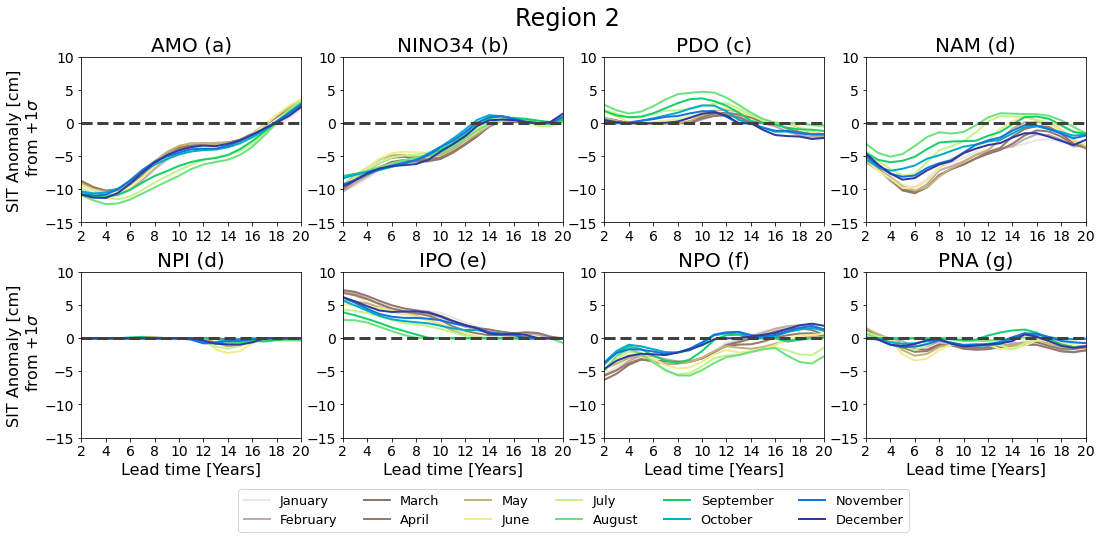

In [50]:
#plot the 8 modes of variability by month for a single region
region_ = 2

#define the colors
cmap = plt.cm.terrain  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)][::-1][10:] #all the colors in the cmap

fig, axes = plt.subplots(2,4,figsize=[18,7])

for var_i, var_dataset in enumerate(['AMO', 'NINO34', 'PDO', 'NAM', 'NPI', 
                                     'IPO', 'NPO', 'PNA']):
    y = int(var_i % 4)
    x = int(np.floor(var_i/4))    
    
    for month_ in np.arange(1,13):
        
        axes[x][y].plot(np.arange(2,21), coefs_CMIP6.sel(month=month_).sel(
            alpha=0.01).sel(region=region_).sel(
            variable=var_dataset)*100, c=cmaplist[::22][month_-1], linewidth=2,
            linestyle='-', label=month_names[month_-1])

    axes[x][y].axhline(0, linestyle='--', c='0.25', linewidth=3);
    # axes[x][y].legend()
    axes[x][y].set_xlim(2,15)
    axes[x][y].set_ylim(-15,10)
    # axes[x][y].set_yticks(np.arange(-2.5,2.1,0.5))
    axes[x][y].set_xticks(np.arange(2,21,2))
    axes[x][y].tick_params(axis='both', labelsize=14)
    
    if x==1:
        axes[x][y].set_xlabel('Lead time [Years]', fontsize=16)
    if y==0:
        axes[x][y].set_ylabel(r'SIT Anomaly [cm]'+'\n'+r' from $+1 \sigma$', 
                              fontsize=16)
    if x==1:
        axes[x][y].set_title(var_dataset+' ('+letter_list[var_i-1]+')', 
                             fontsize=20)
    else:
        axes[x][y].set_title(var_dataset+' ('+letter_list[var_i]+')', 
                             fontsize=20)

plt.legend(bbox_to_anchor=(-1.33, -0.55), loc='lower center', 
           borderaxespad=-0.25, ncol=6, fontsize=13)


plt.subplots_adjust(hspace=0.3, wspace=0.19)
plt.suptitle(f'Region {region_}', fontsize=24);